In [ ]:
# default_exp plots

In [ ]:
#export
import numpy
from matplotlib import pyplot
from matplotlib.patches import FancyArrowPatch, Rectangle

# plots

> Various functions for plotting

In [ ]:
#export
def plot_dpsi_comparison_by_readcount(data, filter_ind=[], *args, **kwargs):
    """
    **Arguments:**
    data - a SplicingEvents object
    filter_ind (optional) - an array passed an index to select which data points to visualize
    *args, **kwargs - additional arguments passed to pyplot.scatter """
    ax1=pyplot.subplot(121)
    if filter_ind==[]:
        x, y, y_corr=(data.totalreads, 
                      data.orig.dpsi, 
                      data.dpsi)
    else:
        x, y, y_corr=(data.totalreads[filter_ind], 
                     data.orig.dpsi[filter_ind],
                     data.dpsi[filter_ind])

    pyplot.scatter(x, y, *args, **kwargs)
    pyplot.xscale('log')
    pyplot.ylabel('dPSI (No shrinkage)')

    ax2=pyplot.subplot(122,sharey=ax1)
    pyplot.scatter(x, y_corr, *args, **kwargs)
    pyplot.xscale('log')
    pyplot.ylabel('dPSI (Shrinkage)')
    return ax1, ax2





In [ ]:
#export
def plot_shrinkage(data, filter_ind=[], *args, **kwargs):
    if filter_ind==[]:
        x, y=data.orig.dpsi,data.dpsi
    else:
        x,y=data.orig.dpsi[filter_ind], data.dpsi[filter_ind]

    pyplot.scatter(x,y, *args, **kwargs)
    pyplot.ylim(y.min()-.05, y.max()+.05)

    pyplot.xlabel('dPSI (No shrinkage)')
    pyplot.ylabel('dPSI (Shrinkage)')
    pyplot.plot([-1,1],[-1,1], c='black', ls='--', lw=1)

In [ ]:
#export

def plot_shrinkage_by_readcount(data, filter_ind=[], *args, **kwargs):

    x, y=(data.totalreads, 
            numpy.abs(data.orig.dpsi-data.dpsi))
    if filter_ind!=[]:
        x, y=x[filter_ind], y[filter_ind]
    pyplot.scatter(x,y, *args, **kwargs)
    pyplot.ylim(y.min()-.05, y.max()+.05)
    pyplot.xscale('log')
    pyplot.xlabel('Total reads')
    pyplot.ylabel('Amount of shrinkage (dPSI_rMAT - dPSI_ashr)')
#         pyplot.plot([-1,1],[-1,1], c='black', ls='--', lw=1)

In [ ]:
#export
def curvedarrow( start, end, rad=.5,lw=3):

    ax=pyplot.gca()
    style = f"Simple, tail_width=0.5, head_width={2*lw}, head_length={4*lw}"
    kw = dict(arrowstyle=style, color="k")
    patch=FancyArrowPatch(start, end,connectionstyle=f"arc3,rad={-1*rad}",lw=lw, **kw)
    pyplot.scatter([start[0], end[0]], [start[1], end[1]], alpha=0)
    ax.add_patch(patch)



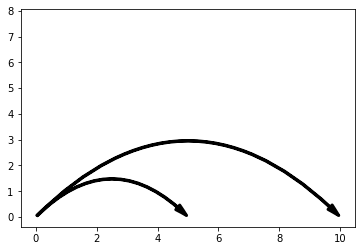

In [ ]:
fig=pyplot.figure()
curvedarrow([0,0], [10,0], .5)
curvedarrow([0,0], [5,0], .5)
# pyplot.xlim(-20,30)
# pyplot.ylim(0,15)

In [ ]:
def draw_bar(start, end,height=None,**kwargs):
    
    ylim=pyplot.ylim()
    if isinstance(height,type(None)):
        height=.075*(max(ylim)-min(ylim))
    ax=pyplot.gca()
    cx=start
    width=end-start
    cy=-height/2
    patch=Rectangle((cx,cy), width=width, height=height, **kwargs)
    pyplot.scatter([start, end], [-height, height], alpha=0.0)

    ax.add_patch(patch)


In [ ]:
#export
def plot_arc(start, end, height=1,y0=0, n_pieces=100,lw=2, c='black', *args, **kwargs):
    """Plot half a circle.
    
    ****
    **Arguments:**
    
    `start`, `end`: The start and end on the X-axis.
    
    `height` (default=1 ): How high the arc will be
    
    `y0` (default : 0): The position of the arc on the y-axis at the start and end
    
    `n_pieces` (default 100): How many lines to approximate the arc with
    
    `lw` : The line width
    
    `c`: The color
    
    `*args`, `**kwargs`: Arguments and keyword arguments passed to pyplot.plot
    
    ****
    **Returns**: The output of pyplot.plot
    """
    x=numpy.linspace(-1,1,n_pieces+1)
    h=(1-x**2)**.5
    height=(end-start)/2
    plt=pyplot.plot(numpy.linspace(start,end,n_pieces+1),
               h*height+y0, lw=lw, c=c, *args, **kwargs)
    return plt
    

In [ ]:
#export
def plot_junction(start, end, coordinate_mapper=None,y=0, direction=1,k=.8,lw=2, c='black', *args, **kwargs):
    """Plot a splice junction as an arc between the two splice sites.
    
    ****
    **Arguments:**
    
    `start`, `end` (int): The coordinates of the 5' and 3' splice sites (the order does not matter)
    
    `coordinate_mapper` (dict): A dictionary that replaces the actual splice site coordinates with \
    with coordinates that are easier to visualize. This can be constructed using `redefine_coordinates`.
    
    `y`: The position of the junction on the y-axis
    
    `direction` (1 or -1): Whether to plot the junctions above or below zero on the y-axis
    
    `k` (positive float): Controls the relative heights of the plotted splice junctions to make the \
    plot less crowded.
    
    `lw` : The line width
    
    `c`: The color
    
    `*args`, `**kwargs`: Arguments and keyword arguments passed to plot_arc
    
    ****
    **Returns**: The output of `plot_arc`
    """
    left=min([start, end])
    right=max([start, end])
    if isinstance(coordinate_mapper, type(None))==False:
        left=coordinate_mapper[left]
        right=coordinate_mapper[right]
    distance=right-left
    height=direction*(distance/2)**k
    midpoint=(left+right)/2
#     pyplot.plot([left, midpoint], [0,height ], lw=lw, c=c, *args, **kwargs)
#     pyplot.plot([right,midpoint], [0,height ], lw=lw, c=c, *args, **kwargs)   

    return plot_arc(left, right, height,y0=y,lw=lw, c=c, *args, **kwargs)
        
    
def plot_exon(left,right,coordinate_mapper=None,y=0,lw=5, *args, **kwargs):
    """Plot an exon as a line.
    
    ****
    **Arguments:**
    
    `start`, `end` (int): The coordinates of the 5' and 3' splice sites (the order does not matter)
    
    `y`: The position of the exon on the y-axis
    
    `coordinate_mapper` (dict): A dictionary that replaces the actual splice site coordinates with \
    with coordinates that are easier to visualize. This can be constructed using `redefine_coordinates`.
    
    `lw` : The line width
    
    `*args`, `**kwargs`: Arguments and keyword arguments passed to plot_arc
    
    ****
    **Returns**: The output of pyplot.plot
    """
    if isinstance(coordinate_mapper, type(None))==True:
        plt=pyplot.plot([left, right], [y,y], lw=lw, *args, **kwargs)
    else:
        plt=pyplot.plot([coordinate_mapper[left], coordinate_mapper[right]],[y,y], lw=lw, *args, **kwargs)        
    return plt

In [ ]:
#export
def redefine_coordinates(coordinates,simplify=True, spacer=50):
    """Constructs a dictionary that assigns coordinates to a regular scale. Useful when \
    visualizing transcripts, where the introns are often much longer than the exons.
    
    ****
    **Arguments:**
    
    `coordinates` (iterable): An array or list of one-dimensional coordinates 
    
    `simplify` (bool): If True, reassign the coordinates to regular grid. If False, the dictionary \
    will map the coordinates back to their original values.
    
    `spacer` (int): How far apart the redefined coordinates should be.
    
    ****
    **Returns:**: Dictionary keyed by the original coordinates, storing their new values.
    
    """
    coordinates=numpy.array(coordinates).flatten()
    
    coor_array=numpy.array(sorted(list(set(coordinates))))

    new_coor=numpy.arange(len(coor_array))*spacer
    if simplify==True:
        remap_dict=dict(zip(coor_array, new_coor))
    else:
        remap_dict=dict(zip(coor_array, coor_array))
        
    return remap_dict

In [ ]:
#export
class SpliceGraphPlot():
    """A class for plotting and storing the information needed to plot a SpliceGraph.
    
    ****
    **Arguments:**
    
    `sg` (`SpliceGraph`): The splice graph to be plotted
    
    `simplify_distances` (bool, default True): Whether to replace the actual positions of the splice sites with \
    a regular grid
    
    `coordinate_mapper (dict or None): An optional dictionary defining simplified coordinates that will be used \
    instead of calling `redefine_coordinates`.
    
    `jxn_kwargs`: Keyword arguments passed to `plot_junction`
    
    `exon_kwargs`: Keyword arguments passed to `plot_exon`
    
    ****
    **Attributes:**
    
    coordinate_mapper (dict): The dictionary for remapping the splice site coordinates
    
    exon_patchs (list): The pyplot patches representing exons
    
    junction_patchs (list): The pyplot patches representing junctions
    
    """
    def __init__(self, sg,simplify_distances=True, coordinate_mapper=None,jxn_kwargs={}, exon_kwargs={}):
        exon_segments=sg.nodes
        junctions=sg.edges

        boundary_list=[]
        for i,seg in exon_segments:
            left,right=seg['info'].start, seg['info'].end
            boundary_list.append([left, right])
        if isinstance(coordinate_mapper, type(None)):
            self.coordinate_mapper=redefine_coordinates(boundary_list, simplify=simplify_distances)
        else:
            self.coordinate_mapper=coordinate_mapper
        self.exon_patches=[]
        for i,seg in exon_segments:
            left,right=seg['info'].start, seg['info'].end
            self.exon_patches.append(plot_exon(left, right, coordinate_mapper=self.coordinate_mapper, **exon_kwargs))

        self.junction_patches=[]
        for i,j,jxn in junctions:
            kind, start, end=jxn['info'].kind,jxn['info'].start,jxn['info'].end
            if kind!='EEJ':
                continue
            self.junction_patches.append(plot_junction(start, end, coordinate_mapper=self.coordinate_mapper, **jxn_kwargs))

def plot_splice_graph( sg, simplify_distances=True,coordinate_mapper=None,jxn_kwargs={}, exon_kwargs={}):
    """Visualize a splice graph
    
    ****
    **Arguments:**
    
    `sg` (`SpliceGraph`): The splice graph to be plotted
    
    `simplify_distances` (bool, default True): Whether to replace the actual positions of the splice sites with \
    a regular grid
    
    `coordinate_mapper (dict or None): An optional dictionary defining simplified coordinates that will be used \
    instead of calling `redefine_coordinates`.
    
    `jxn_kwargs`: Keyword arguments passed to `plot_junction`
    
    `exon_kwargs`: Keyword arguments passed to `plot_exon`
    
    ****
    **Returns:** A SpliceGraphPlot object"""
    return SpliceGraphPlot( sg, simplify_distances=simplify_distances,
                           coordinate_mapper=coordinate_mapper,
                           jxn_kwargs=jxn_kwargs, exon_kwargs=exon_kwargs)


In [ ]:
#export
class ExonIntronPlot():
    """A class for plotting and storing the information needed to plot a SpliceGraph.
    
    ****
    **Arguments:**
    
    `sg` (`SpliceGraph`): The splice graph to be plotted
    
    `simplify_distances` (bool, default True): Whether to replace the actual positions of the splice sites with \
    a regular grid
    
    `coordinate_mapper (dict or None): An optional dictionary defining simplified coordinates that will be used \
    instead of calling `redefine_coordinates`.
    
    `jxn_kwargs`: Keyword arguments passed to `plot_junction`
    
    `exon_kwargs`: Keyword arguments passed to `plot_exon`
    
    ****
    **Attributes:**
    
    coordinate_mapper (dict): The dictionary for remapping the splice site coordinates
    
    exon_patchs (list): The pyplot patches representing exons
    
    junction_patchs (list): The pyplot patches representing junctions
    
    """
    def __init__(self, sg,y=0,simplify_distances=True,exon_lw=5, intron_lw=2,intron_color='black',
                 coordinate_mapper=None,intron_kwargs={}, exon_kwargs={}):
        exon_segments=sg.nodes
        junctions=sg.edges

        boundary_list=[]
        for i,seg in exon_segments:
            left,right=seg['info'].start, seg['info'].end
            boundary_list.append([left, right])
        if isinstance(coordinate_mapper, type(None)):
            self.coordinate_mapper=redefine_coordinates(boundary_list, simplify=simplify_distances)
        else:
            self.coordinate_mapper=coordinate_mapper
        self.exon_patches=[]
        exon_boundaries=[]
        for i,seg in exon_segments:
            left,right=seg['info'].start, seg['info'].end
            exon_boundaries.append(left)
            exon_boundaries.append(right)
            
            self.exon_patches.append(plot_exon(left, right, y=y,lw=exon_lw, coordinate_mapper=self.coordinate_mapper, **exon_kwargs))
        
        tx_start=self.coordinate_mapper(numpy.min(exon_boundaries))
        tx_end=self.coordinate_mapper(numpy.max(exon_boundaries))
        
        self.intron_patches=pyplot.plot([tx_start, tx_end],[y,y] , lw=intron_lw, c=intron_color)
def plot_exon_intron_graph( sg,y=0, simplify_distances=True,
                           exon_lw=5, intron_lw=2,intron_color='black',
                           coordinate_mapper=None,jxn_kwargs={}, exon_kwargs={}):
    """Visualize a splice graph
    
    ****
    **Arguments:**
    
    `sg` (`SpliceGraph`): The splice graph to be plotted
    
    `simplify_distances` (bool, default True): Whether to replace the actual positions of the splice sites with \
    a regular grid
    
    `coordinate_mapper (dict or None): An optional dictionary defining simplified coordinates that will be used \
    instead of calling `redefine_coordinates`.
    
    `jxn_kwargs`: Keyword arguments passed to `plot_junction`
    
    `exon_kwargs`: Keyword arguments passed to `plot_exon`
    
    ****
    **Returns:** A SpliceGraphPlot object"""
    return ExonIntronPlot( sg,y=y,simplify_distances=simplify_distances,
                          exon_lw=exon_lw, intron_lw=intron_lw,intron_color=intron_color,
                           coordinate_mapper=coordinate_mapper,
                           intron_kwargs=jxn_kwargs, exon_kwargs=exon_kwargs)
